1. Install the necessary packages
2. Import you data and perform basic data exploration phase
    1. Display general information about the dataset
    2. Create a pandas profiling reports to gain insights into the dataset
    3. Handle Missing and corrupted values
    4. Remove duplicates, if they exist
    5. Handle outliers, if they exist
    6. Encode categorical features
3. Based on the previous data exploration train and test a machine learning classifier
4. Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form
5. Import your ML model into the streamlit application and start making predictions given the provided features values
6. Deploy your application on Streamlit share:
    1. Create a github and a streamlit share accounts
    2. Create a new git repo
    3. Upload your local code to the newly created git repo
    4. log in to your streamlit account an deploy your application from the git repo
 

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [93]:
data = pd.read_csv("Financial_inclusion_dataset.csv")
df = data.copy()

In [94]:
var = pd.read_csv('VariableDefinitions.csv')
var.reset_index(drop=True)
var.rename(columns={'Variable Definitions' : 'Variables','Unnamed: 1' : 'Definitions'}, inplace= True)

In [95]:
var = var.loc[[4,10,11,0,7,1]]

In [96]:
var.reset_index(drop=True, inplace=True)


In [97]:
var.to_csv('Variable.csv')

In [98]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [100]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [101]:
df['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [102]:
for i in df.columns:
    print(f"{df[i].value_counts()}\n")

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: uniqueid, Length: 8735, dtype: int64

No     20212
Yes     3312
Name: bank_account, dtype: int64

Rural    14343
Urban     9181
Name: location_type, dtype: int64

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64

30     1056
35      836
25      792
28      748
32      715
       ... 
100       5
93        4
96        3
99        2
97        1
Name: ag

In [103]:
if df['bank_account'].dtypes == 'int':
    print('Ues')

In [104]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def transformer(dataframe):
    lb = LabelEncoder()
    scaler = MinMaxScaler()

    dep = dataframe.drop('bank_account', axis=1)

    for i in dep.columns:
        if i in dataframe.select_dtypes(include='number').columns:
            # Scale only numerical columns
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
        elif i in dataframe.select_dtypes(include=['object', 'category']).columns:
            # Label encode categorical columns
            dataframe[i] = lb.fit_transform(dataframe[i])

    return dataframe


transformer(df)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,1.0,0,Yes,0,1,0.10,0.095238,0,5,2,3,9
1,0,1.0,1111,No,0,0,0.20,0.642857,0,1,4,0,4
2,0,1.0,2222,Yes,1,1,0.20,0.119048,1,3,3,5,9
3,0,1.0,3333,No,0,1,0.20,0.214286,0,1,2,2,3
4,0,1.0,4444,No,1,0,0.35,0.119048,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,1.0,1239,No,0,1,0.15,0.380952,0,1,0,0,7
23520,3,1.0,1240,No,0,1,0.05,0.130952,0,1,3,3,7
23521,3,1.0,1241,No,0,1,0.20,0.130952,0,4,4,2,7
23522,3,1.0,1242,No,1,1,0.30,0.166667,0,4,0,3,9


In [105]:
df.drop('uniqueid', axis = 1, inplace=True)

In [106]:
lb = LabelEncoder()
df['bank_account'] = lb.fit_transform(df['bank_account'])

In [107]:
df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,1.0,1,0,1,0.10,0.095238,0,5,2,3,9
1,0,1.0,0,0,0,0.20,0.642857,0,1,4,0,4
2,0,1.0,1,1,1,0.20,0.119048,1,3,3,5,9
3,0,1.0,0,0,1,0.20,0.214286,0,1,2,2,3
4,0,1.0,0,1,0,0.35,0.119048,1,0,3,2,5


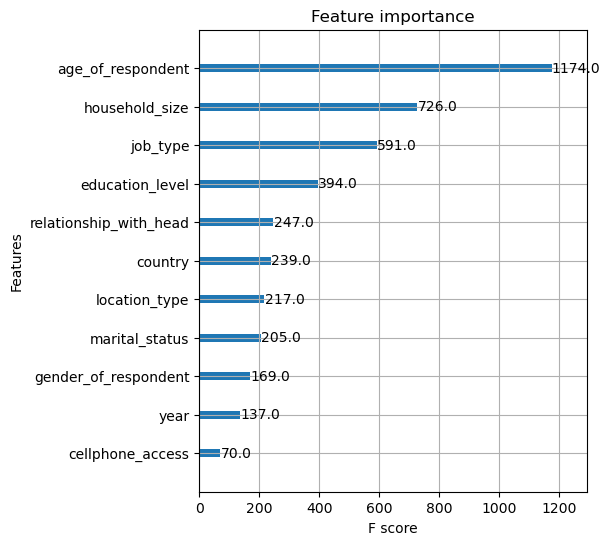

In [108]:
import xgboost as xgb

X = df.drop('bank_account', axis = 1)
Y = df.bank_account

xg_model = xgb.XGBClassifier()
xg_model.fit(X,Y)

plt.rcParams['figure.figsize'] = (5, 6)
xgb.plot_importance(xg_model, importance_type= 'weight')
plt.show()

In [109]:
# ANOVA F-value between label/feature

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(X,Y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(X.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(10, 'F_classif_score')
k1.reset_index(drop = True, inplace = True)

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
0,education_level,2754.442133
1,cellphone_access,1081.598580
2,country,628.835013
3,gender_of_respondent,327.786325
4,year,300.529753
5,location_type,180.595902
6,relationship_with_head,118.679875
7,job_type,97.262178
8,marital_status,35.352281
9,household_size,18.888950


In [110]:
feature = df[['bank_account','cellphone_access','education_level','job_type','country', 'year', 'gender_of_respondent']]

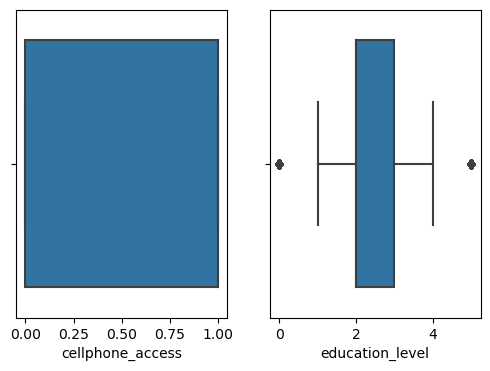

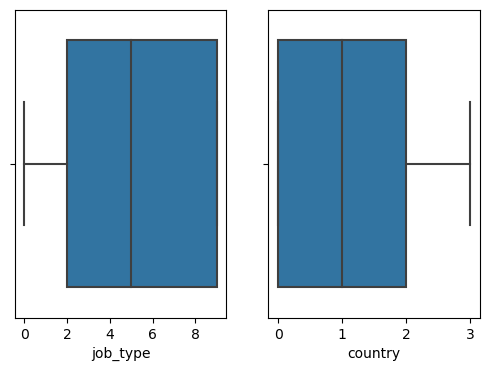

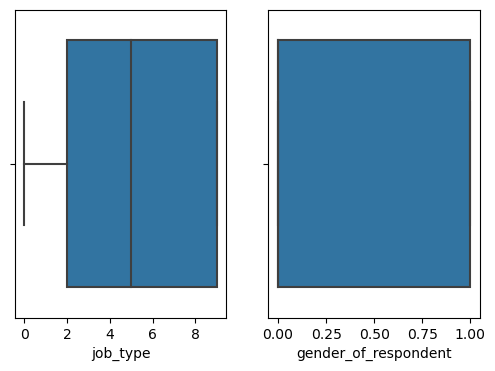

In [111]:
def OutlierCheck(dataframe,a,b):
    plt.figure(figsize=(6,4))
    
    plt.subplot(1,2,1)
    sns.boxplot(x = dataframe[a])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = dataframe[b])
    
    plt.show()
    
OutlierCheck(feature,'cellphone_access','education_level')
OutlierCheck(feature, 'job_type','country')
OutlierCheck(feature,  'job_type', 'gender_of_respondent')

In [112]:
x = feature.drop('bank_account',axis = 1)
y = feature.bank_account

In [113]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.20, random_state=999)

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier()

# You can then fit the rf_model to your data and use it for classification tasks
# For example, assuming you have training data X_train and corresponding labels y_train:
rf_model.fit(xtrain, ytrain)

# After training, you can make predictions
y_pred = rf_model.predict(xtest)
rf_score = accuracy_score(y_pred, ytest)
rf_score

y_t = rf_model.predict(xtrain)
score = accuracy_score(y_t, ytrain)

print(classification_report(y_pred, ytest))
print(rf_score)
print(score)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      4387
           1       0.33      0.71      0.45       318

    accuracy                           0.88      4705
   macro avg       0.65      0.80      0.69      4705
weighted avg       0.93      0.88      0.90      4705

0.881615302869288
0.8905361602635634


In [115]:
import pickle

pickle.dump(rf_model,open('randomForest_model.pkl', 'wb'))

In [116]:
# import joblib

# joblib.dump(rf_model, 'rf_model.pkl')